In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing 
%matplotlib inline

In [3]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-05-29 03:57:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K   135KB/s    in 0.3s    

2020-05-29 03:57:21 (135 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [6]:
df = pd.read_csv('teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


Checking number in each class of the dataset

In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

281 : Plus Service
266 : Basic Service
236 : Total Service
217 : E-Service Customers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafa9f6c390>]],
      dtype=object)

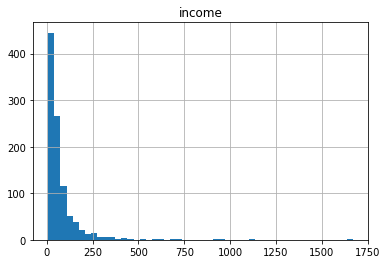

In [8]:
df.hist(column = 'income', bins = 50)

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [10]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

##### Normalization
Data standardization gives 0 mean and unit variance

In [14]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [16]:
# Train test split
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 4)
print('Train Set : ', xTrain.shape, yTrain.shape)
print('Test Set : ', xTest.shape, yTest.shape)

Train Set :  (800, 11) (800,)
Test Set :  (200, 11) (200,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
neighbor = KNeighborsClassifier(n_neighbors = k).fit(xTrain, yTrain)
neighbor

KNeighborsClassifier(n_neighbors=4)

In [18]:
yHat = neighbor.predict(xTest)
yHat[0:5]

array([1, 1, 3, 2, 4])

Accuracy Evaluation

In [20]:
from sklearn import metrics

print('Train test accuracy : ', metrics.accuracy_score(yTrain, neighbor.predict(xTrain)))
print('Test set accuracy : ', metrics.accuracy_score(yTest, yHat))

Train test accuracy :  0.5475
Test set accuracy :  0.32


In [22]:
k = 6
neighbor = KNeighborsClassifier(n_neighbors = k).fit(xTrain, yTrain)
yHat = neighbor.predict(xTest)
print('Train test accuracy : ', metrics.accuracy_score(yTrain, neighbor.predict(xTrain)))
print('Test set accuracy : ', metrics.accuracy_score(yTest, yHat))

Train test accuracy :  0.51625
Test set accuracy :  0.31


In [24]:
K = 10
meanAccuracy = np.zeros((K - 1))
stdAccuracy = np.zeros((K - 1))
confusionMatrix = [];

for n in range(1, K):
    
    neighbor = KNeighborsClassifier(n_neighbors = n).fit(xTrain, yTrain)
    yHat = neighbor.predict(xTest)
    meanAccuracy[n-1] = metrics.accuracy_score(yTest, yHat)
    stdAccuracy[n-1] = np.std(yHat == yTest) / np.sqrt(yHat.shape[0])
    
print('Mean Accuracy : ', meanAccuracy)
print('Std Accuracy : ', stdAccuracy)

Mean Accuracy :  [0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
Std Accuracy :  [0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


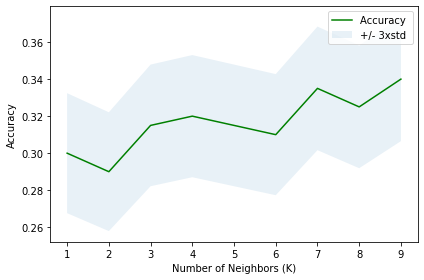

In [26]:
plt.plot(range(1, K), meanAccuracy, 'g')
plt.fill_between(range(1, K), meanAccuracy - 1 * stdAccuracy, meanAccuracy + 1 * stdAccuracy, alpha = 0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [28]:
print('Best accuracy was with ', meanAccuracy.max(), ' with K = ', meanAccuracy.argmax() + 1)

Best accuracy was with  0.34  with K =  9
